## Importamos librerías 

In [61]:
from wikiframe import Extractor
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

## Variables Principales

In [5]:
extractor = Extractor('data')
df_dict = extractor.extract_from_csv()
train = df_dict['house_train_raw']
test = df_dict['houses_test_raw']

In [25]:
#Sepramos las varaiables categoricas y las numericas
categorical_cols = [x for x in train if train[x].dtype == "object"]
numerical_cols = [x for x in train if train[x].dtype == "int64" or train[x].dtype == "float64" ]

print(f'Existen {len(categorical_cols)} variables categoricas y {len(numerical_cols)} variables numericas')

Existen 43 variables categoricas y 38 variables numericas


## Visualización de Datos

### Variables Numéricas

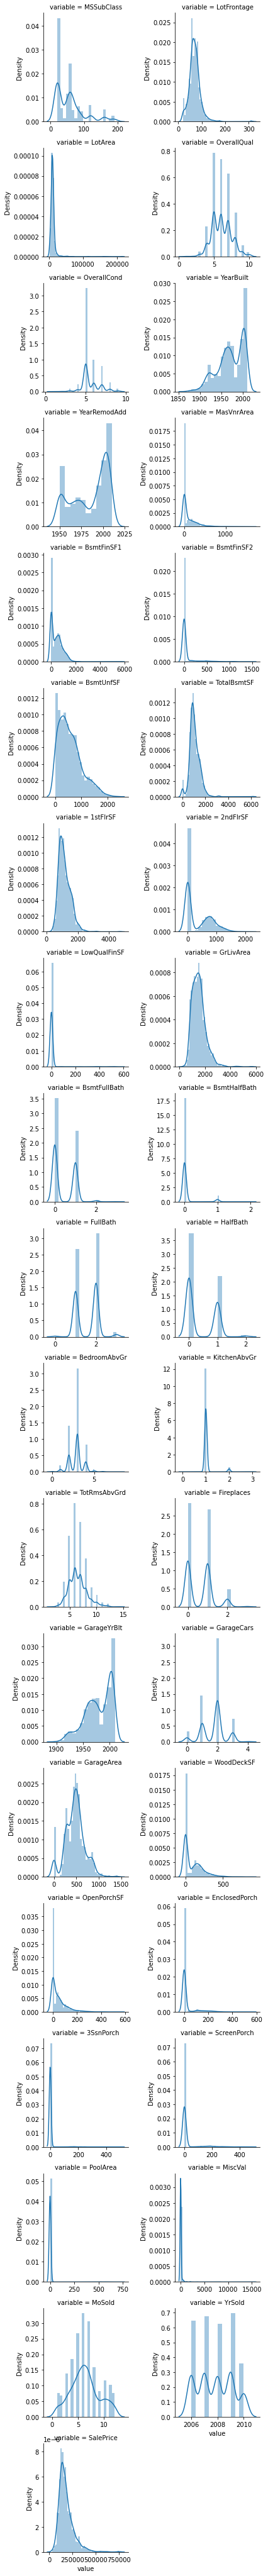

In [67]:
f = pd.melt(train, value_vars=numerical_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

### Conteo de Nulos
Debido que a las variables categoricas se codificarán mediante one-hot encoding, no se puede eliminará los nulos.
En el pipeline de preprocesamiento se tratarán los nulos en el caso de las columnas numéricas.

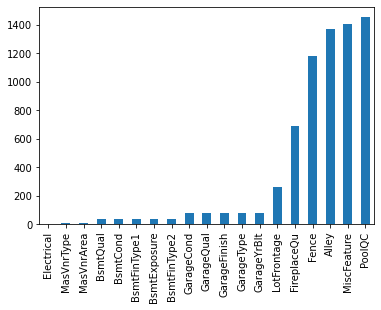

In [78]:
nulled = train.isnull().sum()
nulled = nulled[nulled > 0]
nulled.sort_values(inplace=True)
nulled.plot(kind='bar')
plt.show()

### HeatMap

Un overview de las correlaciones entre las variables numéricas.

-Nota:
Las variables de alta correlación serán tratadas con ElastiCNet.

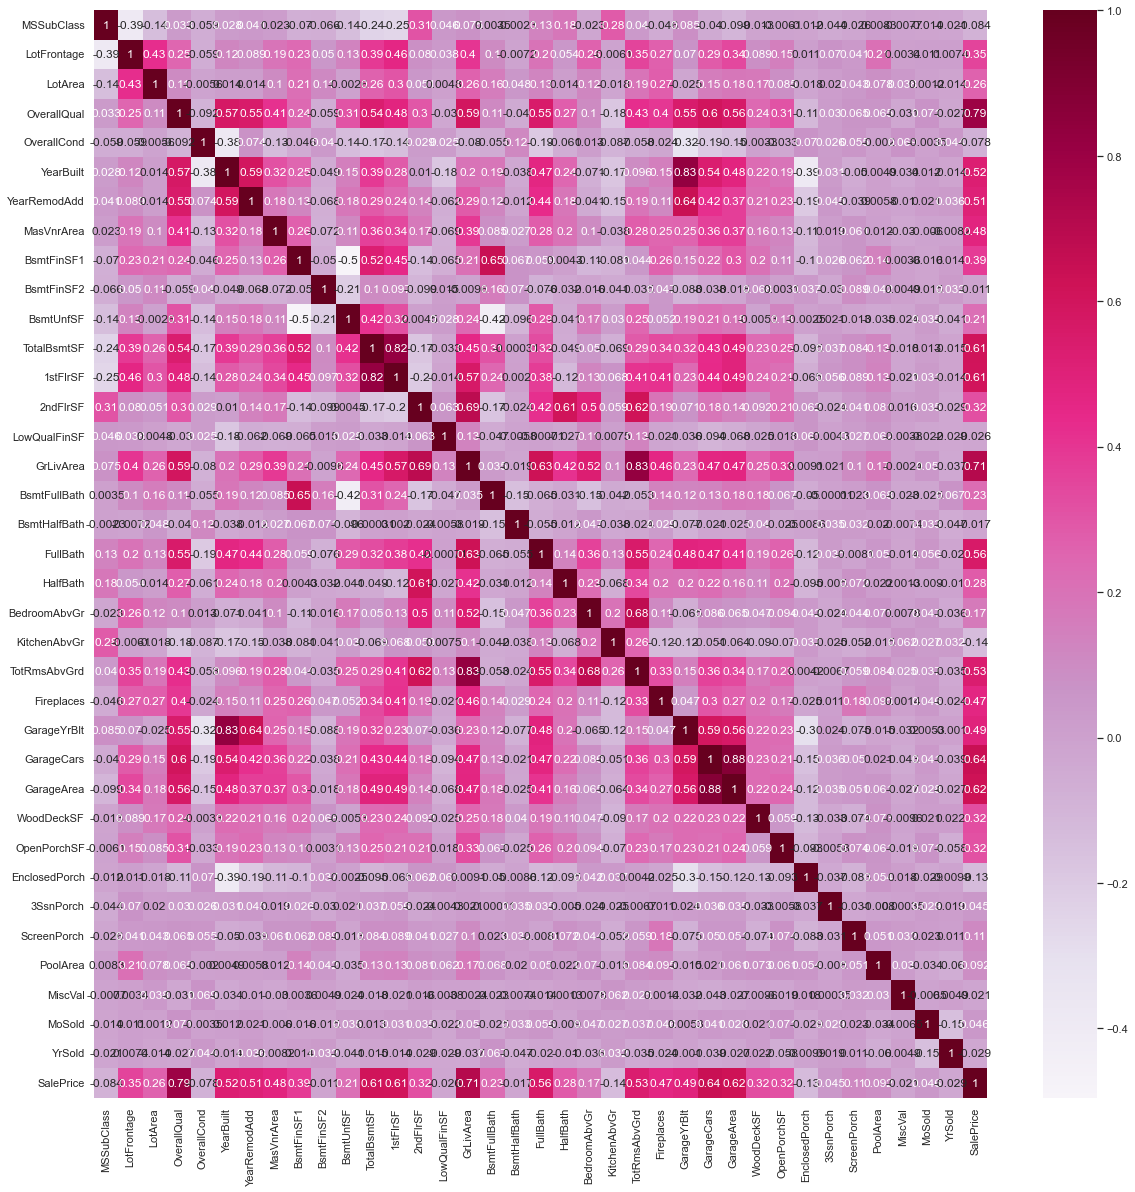

In [84]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='PuRd', cbar=True)
plt.show()
